### Data cleaning and preparation


In [1]:
import pandas as pd

# Read in the CSV file and parse the 'CMPLNT_FR_DT' column as a datetime format
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv", parse_dates=['CMPLNT_FR_DT'])

# Check for any null or missing values in the 'CMPLNT_FR_DT' column
null_dates = df[pd.isna(df['CMPLNT_FR_DT'])]
print(null_dates)

# Remove rows with null or missing values in the 'CMPLNT_FR_DT' column
df = df.dropna(subset=['CMPLNT_FR_DT'])


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_31676\384588550.py:4: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYPD_Complaint_Data_Historic.csv", parse_dates=['CMPLNT_FR_DT'])


         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
20568     389149830          NaN     13:55:00          NaN          NaN   
57141     550470474          NaN     18:00:00   03/17/2007     18:30:00   
61657     901463880          NaN     10:00:00          NaN          NaN   
66297     500839691          NaN     03:00:00   01/17/2006     15:30:00   
70067     803363254          NaN     00:30:00   09/10/2009     08:30:00   
...             ...          ...          ...          ...          ...   
5904759   619449411          NaN     11:30:00   06/18/2015     13:40:00   
5905442   457952823          NaN     03:00:00          NaN          NaN   
5915997   776966472          NaN     07:45:00   01/29/2013     07:47:00   
5962944   959125529          NaN     06:00:00   12/02/2013     06:30:00   
6053501   912522930          NaN     10:00:00   08/01/2014     11:01:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                 OFNS_DESC  PD_CD  ...  \
20568           43

In [76]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F


In [2]:
import pandas as pd
import numpy as np

# Define the data types for each column
dtypes = {
    "CMPLNT_FR_DT": "object",
    "CMPLNT_FR_TM": "object",
    "BORO_NM": "category",
    "OFNS_DESC": "category",
    "LAW_CAT_CD": "category"
}

# Remove rows with null or missing values in the 'CMPLNT_FR_DT' column
df = df.dropna(subset=['CMPLNT_FR_DT'])

# Remove any rows that will give the OutOfBoundsDatetime error
df = df[np.logical_and(df['CMPLNT_FR_DT'] >= '1900-01-01', df['CMPLNT_FR_DT'] <= '2023-04-12')]

# Convert date and time columns to datetime format
df["CMPLNT_FR_TM"] = pd.to_datetime(df["CMPLNT_FR_TM"], format="%H:%M:%S")

# Convert categorical columns to category data type
df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]] = df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]].astype("category")


In [3]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Set the categories of the categorical columns
df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]] = df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]].astype("category")
df["BORO_NM"] = df["BORO_NM"].cat.add_categories(['UNKNOWN'])
df["OFNS_DESC"] = df["OFNS_DESC"].cat.add_categories(['UNKNOWN'])
df["LAW_CAT_CD"] = df["LAW_CAT_CD"].cat.add_categories(['UNKNOWN'])

# Fill in missing values with unknown category
df["BORO_NM"].fillna("UNKNOWN", inplace=True)
df["OFNS_DESC"].fillna("UNKNOWN", inplace=True)
df["LAW_CAT_CD"].fillna("UNKNOWN", inplace=True)

# Drop any rows with missing or invalid datetime values
df.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True)

# Convert categorical columns to category
df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]] = df[["BORO_NM", "OFNS_DESC", "LAW_CAT_CD"]].astype("category")

### Data exploration and visualization

* Count the number of crimes by borough and visualize the distribution:

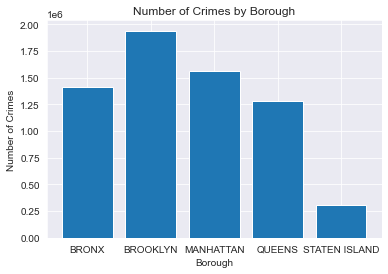

In [80]:
# Count the number of crimes by borough
crimes_by_borough = df.groupby("BORO_NM").size()

# Visualize the distribution
plt.bar(crimes_by_borough.index, crimes_by_borough.values)
plt.title("Number of Crimes by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crimes")
plt.show()


* Count the number of crimes by offense type and visualize the distribution

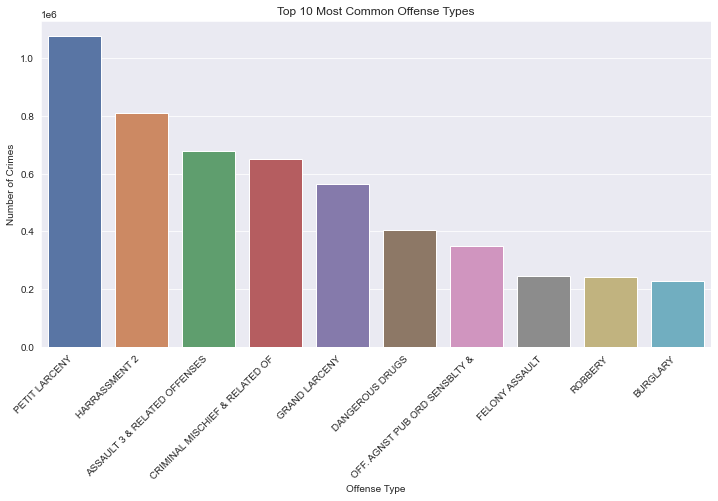

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of crimes by offense type
offense_counts = df['OFNS_DESC'].value_counts().sort_values(ascending=False)[:10]

# Create a bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Common Offense Types')
plt.xticks(rotation=45, ha='right')
sns.barplot(x=offense_counts.index, y=offense_counts.values, palette='deep')
plt.xlabel('Offense Type')
plt.ylabel('Number of Crimes')
plt.show()


In [83]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F


### Victim and Suspect Analysis:

* Investigate victim demographics such as age, gender, and race to understand the profile of crime victims.
* Analyze the relationship between victim characteristics and crime types or locations.
* Explore perpetrator information (if available) to identify patterns and relationships with crime incidents.

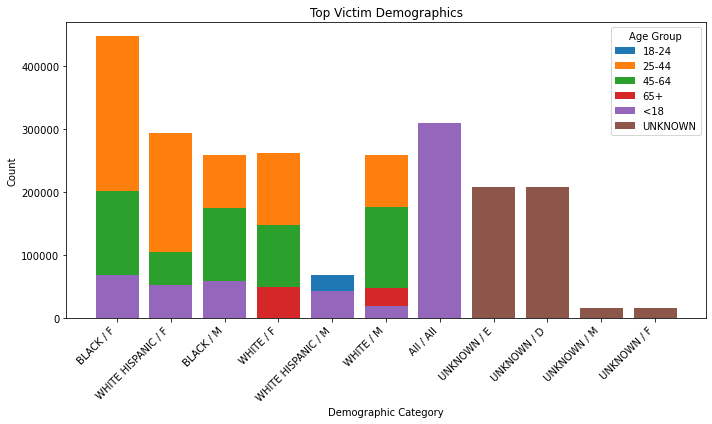

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the victim column names
victim_cols = ['VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

# Check if the victim columns exist in the dataset
missing_cols = [col for col in victim_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"The following columns are missing in the dataset: {missing_cols}")

# Count the occurrences of victim demographics
victim_counts = df[victim_cols].value_counts()

# Set a threshold count for filtering categories
threshold = 5000

# Filter the victim counts based on the threshold
filtered_counts = victim_counts[victim_counts >= threshold]

# Reset index for consistency
filtered_counts = filtered_counts.reset_index()

# Select top N categories
top_n = 5
top_categories = filtered_counts.groupby('VIC_AGE_GROUP').apply(lambda x: x.nlargest(top_n, 0)).reset_index(drop=True)

# Add a row for victims under 18
under_18_counts = df[df['VIC_AGE_GROUP'] == '<18'][victim_cols].value_counts()
under_18_row = pd.DataFrame({'VIC_AGE_GROUP': '<18', 'VIC_RACE': 'All', 'VIC_SEX': 'All', 0: under_18_counts.sum()}, index=[0])
top_categories = pd.concat([top_categories, under_18_row])

# Plotting victim demographics
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors[:len(top_categories['VIC_AGE_GROUP'].unique())]

for i, age_group in enumerate(top_categories['VIC_AGE_GROUP'].unique()):
    group_df = top_categories[top_categories['VIC_AGE_GROUP'] == age_group]
    labels = group_df['VIC_RACE'] + " / " + group_df['VIC_SEX']
    plt.bar(labels, group_df[0], color=colors[i], label=age_group)

plt.title('Top Victim Demographics')
plt.xlabel('Demographic Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


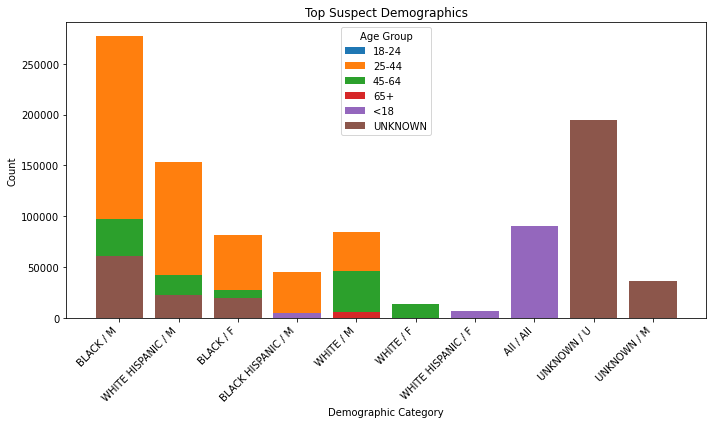

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the suspect column names
suspect_cols = ['SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX']

# Check if the suspect columns exist in the dataset
missing_cols = [col for col in suspect_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"The following columns are missing in the dataset: {missing_cols}")

# Count the occurrences of suspect demographics
suspect_counts = df[suspect_cols].value_counts()

# Set a threshold count for filtering categories
threshold = 5000

# Filter the suspect counts based on the threshold
filtered_counts = suspect_counts[suspect_counts >= threshold]

# Reset index for consistency
filtered_counts = filtered_counts.reset_index()

# Select top N categories
top_n = 5
top_categories = filtered_counts.groupby('SUSP_AGE_GROUP').apply(lambda x: x.nlargest(top_n, 0)).reset_index(drop=True)

# Add a row for suspects under 18
under_18_counts = df[df['SUSP_AGE_GROUP'] == '<18'][suspect_cols].value_counts()
under_18_row = pd.DataFrame({'SUSP_AGE_GROUP': '<18', 'SUSP_RACE': 'All', 'SUSP_SEX': 'All', 0: under_18_counts.sum()}, index=[0])
top_categories = pd.concat([top_categories, under_18_row])

# Plotting suspect demographics
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors[:len(top_categories['SUSP_AGE_GROUP'].unique())]

for i, age_group in enumerate(top_categories['SUSP_AGE_GROUP'].unique()):
    group_df = top_categories[top_categories['SUSP_AGE_GROUP'] == age_group]
    labels = group_df['SUSP_RACE'] + " / " + group_df['SUSP_SEX']
    plt.bar(labels, group_df[0], color=colors[i], label=age_group)

plt.title('Top Suspect Demographics')
plt.xlabel('Demographic Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Crime Clearances and Arrests:

* Analyze the rates of crime clearance and arrests to understand the efficiency of law enforcement.
* Investigate the factors associated with successful crime clearances.
* Identify the crime types or neighborhoods with higher clearance rates.

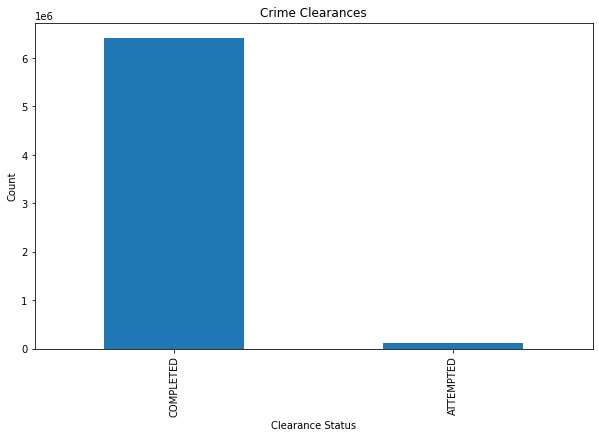

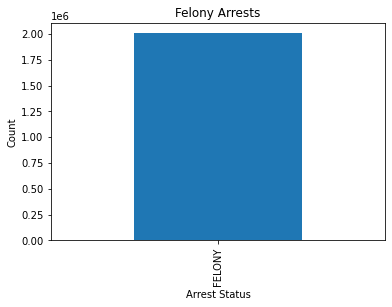

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for crime clearances and arrests
clearance_cols = ['CRM_ATPT_CPTD_CD', 'LAW_CAT_CD']

# Filter rows with valid clearance information
df_clearances = df[df['CRM_ATPT_CPTD_CD'].notnull()]

# Count the occurrences of crime clearances
clearance_counts = df_clearances['CRM_ATPT_CPTD_CD'].value_counts()

# Count the occurrences of arrests by offense level
arrest_counts = df_clearances[df_clearances['LAW_CAT_CD'] == 'FELONY']['LAW_CAT_CD'].value_counts()

# Plotting crime clearances
plt.figure(figsize=(10, 6))
clearance_counts.plot(kind='bar')
plt.title('Crime Clearances')
plt.xlabel('Clearance Status')
plt.ylabel('Count')
plt.show()

# Plotting felony arrests
plt.figure(figsize=(6, 4))
arrest_counts.plot(kind='bar')
plt.title('Felony Arrests')
plt.xlabel('Arrest Status')
plt.ylabel('Count')
plt.show()


### Crime Density Mapping: 
* Create density maps to visualize the intensity of crime incidents in different areas. This can help identify areas with high crime density and assist in resource allocation for law enforcement agencies.

In [2]:
import folium
import pandas as pd

# Drop rows with NaN values in 'Latitude' and 'Longitude' columns
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Select a subset of 100 rows
subset_df = df[['Latitude', 'Longitude']].head(1000)

# Create a map centered around New York
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Plot each point on the map
for index, row in subset_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(ny_map)

# Display the map
ny_map


In [3]:
import folium
from folium.plugins import HeatMap

# Drop rows with NaN values in 'Latitude' and 'Longitude' columns
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Select a subset of 100 rows
subset_df = df[['Latitude', 'Longitude']].head(1000)

# Create a map centered around New York
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Create a list of crime locations
crime_locations = subset_df[['Latitude', 'Longitude']].values

# Add the heat map layer to the map
HeatMap(crime_locations).add_to(ny_map)

# Display the map
ny_map


### Crime Time Analysis:

* Analyze temporal patterns: Explore the distribution of crimes across different times of the day, days of the week, or months of the year.
* Visualize trends: Use histograms, line plots, or heatmaps to visualize the patterns and fluctuations in crime occurrence.
* Inform law enforcement strategies: Gain insights into peak crime hours or days, identify high crime density areas, and allocate resources effectively for crime prevention and response.

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10496\3873543167.py:5: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10496\3873543167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10496\3873543167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

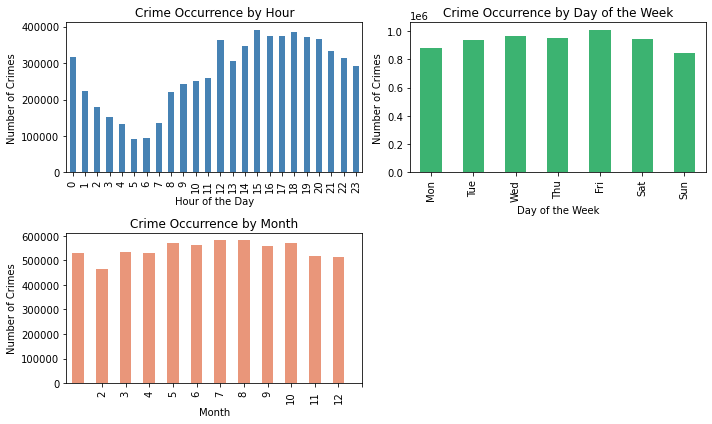

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

# Convert the date and time columns to datetime format with error handling
try:
    df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
    df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
except Exception as e:
    print(f"Error converting date or time columns: {e}")

# Filter out rows with missing or invalid date/time values
df = df.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'])

# Extract time-related features
df['Hour'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['CMPLNT_FR_DT'].dt.dayofweek
df['Month'] = df['CMPLNT_FR_DT'].dt.month

# Count the occurrences of crimes by hour
crime_by_hour = df['Hour'].value_counts().sort_index()

# Count the occurrences of crimes by day of the week
crime_by_dayofweek = df['DayOfWeek'].value_counts().sort_index()

# Count the occurrences of crimes by month
crime_by_month = df['Month'].value_counts().sort_index()

# Plotting the crime time analysis
plt.figure(figsize=(10, 6))

# Plot crime by hour
plt.subplot(2, 2, 1)
crime_by_hour.plot(kind='bar', color='steelblue')
plt.title('Crime Occurrence by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')

# Plot crime by day of the week
plt.subplot(2, 2, 2)
crime_by_dayofweek.plot(kind='bar', color='mediumseagreen')
plt.title('Crime Occurrence by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot crime by month
plt.subplot(2, 2, 3)
crime_by_month.plot(kind='bar', color='darksalmon')
plt.title('Crime Occurrence by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


### Data analysis and modeling:

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Sample 10% of the rows
df = df.sample(frac=0.1, random_state=42)

# Fill missing values with 'Unknown'
df.fillna(value='Unknown', inplace=True)

# Select features and target variable
X = df[["BORO_NM", "KY_CD"]]
y = df["OFNS_DESC"]

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, train_size=0.8, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.998742620562754


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Fill missing values with 'Unknown'
df.fillna(value='Unknown', inplace=True)

# Select features and target variable
X = df[["BORO_NM", "KY_CD"]]
y = df["OFNS_DESC"]

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
X["BORO_NM"] = label_encoder.fit_transform(X["BORO_NM"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get input from user
boro = input("Enter borough name: ")
ky_cd = int(input("Enter offense code: "))

# Encode input using LabelEncoder
boro_encoded = label_encoder.transform([boro])[0]

# Make prediction on input
y_pred = rf.predict([[boro_encoded, ky_cd]])

# Print prediction
print("Predicted offense description:", y_pred[0])


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10496\3656634994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["BORO_NM"] = label_encoder.fit_transform(X["BORO_NM"])


Enter borough name: MANHATTAN
Enter offense code: 341
Predicted offense description: PETIT LARCENY


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Data aggregation and reporting:

In [88]:
import pandas as pd

# Summarize the data by borough and offense type
summary = df.groupby(["BORO_NM", "OFNS_DESC"]).size().reset_index(name="Count")

# Write the summary to a CSV file
summary.to_csv("crime_summary.csv", index=False)
